## I. Problem Description

### Predict if the Merchant is Fraudster or not for an e-commerce client

#### ‘XYZ’ is a large e-commerce company with its operations in several countries. As the online giant grows, so has the number of fraudster merchants are. They deliver counterfeits or, in some cases, nothing at all. Such schemes leave customers duped, and place both legitimate merchants and the company itself in a constant battle to rid the marketplace of scammers. Determining this is also important in budgeting for fraud investigation. It's a well-known problem both to the company and to merchants, which they say hasn't effectively addressed the issue. They are serious about it and want to protect themselves from these fraudulent merchants using technology.

#### You are expected to create an analytical and modelling framework to predict the Merchant Fraudulency(yes/no) based on the quantitative and qualitative features provided in the dataset while answering other questions too cited below.

## Problem Statement

Predict if the Merchant is Fraudster or not for an e-commerce client


## Mounting Google Drive

Mounting google drive to access files

In [111]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


## Importing Library

In [0]:
import os
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score

##### load training data

In [0]:
train_order=pd.read_csv("/gdrive/My Drive/MITH/ProblemDescription_and_Dataset/train_order_data.csv")
train_merchant=pd.read_csv("/gdrive/My Drive/MITH/ProblemDescription_and_Dataset/train_merchant_data.csv")
traindata=pd.read_csv("/gdrive/My Drive/MITH/ProblemDescription_and_Dataset/train.csv")

In [132]:
pandas_profiling.ProfileReport(train_order)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,54213
Total Missing (%),0.0%
Total size in memory,2.9 MiB
Average record size in memory,56.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [133]:
pandas_profiling.ProfileReport(train_merchant)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,54213
Total Missing (%),0.0%
Total size in memory,2.9 MiB
Average record size in memory,56.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,1


Loading all the three csv files given: train_order, train_merchant, train

##### load test data

In [0]:
test_order=pd.read_csv("/gdrive/My Drive/MITH/ProblemDescription_and_Dataset/test_order_data.csv")
test_merchant=pd.read_csv("/gdrive/My Drive/MITH/ProblemDescription_and_Dataset/test_merchant_data.csv")

In [134]:
pandas_profiling.ProfileReport(test_order)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,13554
Total Missing (%),0.0%
Total size in memory,741.4 KiB
Average record size in memory,56.0 B
Numeric,3
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,0


In [135]:
pandas_profiling.ProfileReport(test_merchant)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,7
Number of observations,13554
Total Missing (%),0.0%
Total size in memory,741.4 KiB
Average record size in memory,56.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),1
Rejected,1


Loading test datas

In [136]:
train_order.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146


In [137]:
train_merchant.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,50448,2018-05-01 21:15:11,VATQMMZTVOZUT,F,39,48.151.136.76
1,1746213,338754,2018-04-14 10:13:00,LJCILLBRQZNKS,M,35,94.9.145.169
2,1746213,291127,2018-06-20 07:44:22,JFVHSUGKDAYZV,F,40,58.94.157.121
3,1746213,319919,2018-06-27 01:41:39,WFRXMPLQYXRMY,M,37,193.187.41.186
4,1746213,195911,2018-01-05 00:55:41,GGHKWMSWHCMID,F,27,125.96.20.172


In [138]:
traindata.head()

,Merchant_ID,Fraudster
0,221592,0
1,316935,1
2,38454,1
3,214437,1
4,296240,1


In [139]:
test_order.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706


In [140]:
test_merchant.head()

,Ecommerce_Provider_ID,Merchant_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,1746213,53637,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,1746213,243517,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87
2,1746213,343640,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255
3,1746213,69889,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185
4,1746213,125706,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47


In [0]:
#Merging the datasets: Test and Train
merged_train=train_order.merge(train_merchant, on="Merchant_ID").merge(traindata, on="Merchant_ID")
merged_test=test_order.merge(test_merchant, on="Merchant_ID")

In [142]:
merged_train.head(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0


In [143]:
merged_test.head(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87


In [144]:
merged_train['Fraudster'].value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [145]:
merged_train.sample(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster
49975,155120,0a78ea9afa08,2018-08-23 19:19:57,150,Ads,Internet Banking,284823,1746213,2018-06-30 12:10:07,GEUCHLNIXLGIU,M,43,64.251.42.211,0
32639,154429,75bd0eacb03e,2018-04-20 08:39:37,32,Direct,Debit Card,166548,1746213,2018-04-13 21:05:51,NDXJKONYCODFG,F,33,136.125.196.249,0


In [146]:
merged_test.sample(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address
11049,123042,ed1bd10993fc,2018-01-04 03:01:12,75,Ads,Credit Card,337490,1746213,2018-01-02 03:01:11,TFFVRDMIAXPGK,M,30,19.90.248.214
6704,122285,03cab0ee4145,2018-08-02 09:08:33,48,SEO,Internet Banking,82302,1746213,2018-04-15 12:41:46,ZRBQWEAVABMML,F,23,59.233.249.86


Installing the package to get the IP address to match with the countries

In [147]:
pip install maxminddb-geolite2

In [0]:

from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()
# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = merged_train["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
merged_train['Continent'] = merged_train['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

0    90.731005
1     9.268995
Name: Fraudster, dtype: float64

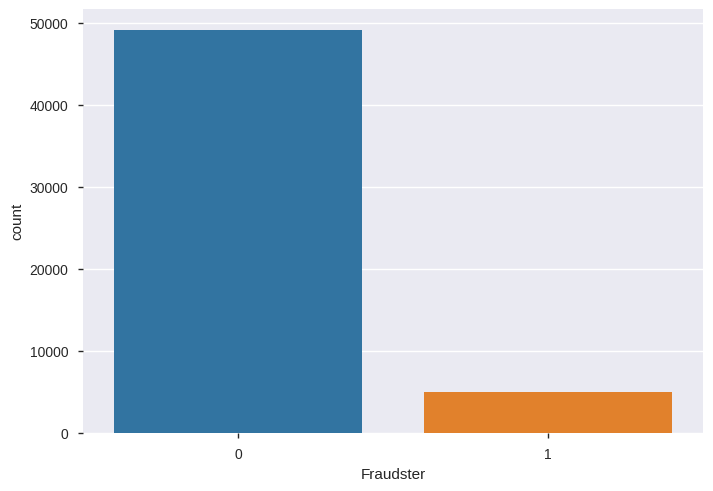

In [150]:
merged_train['Fraudster'].value_counts()
sns.countplot(x='Fraudster',data=merged_train)
plt.show()
(merged_train["Fraudster"].value_counts()/merged_train.shape[0]*100)

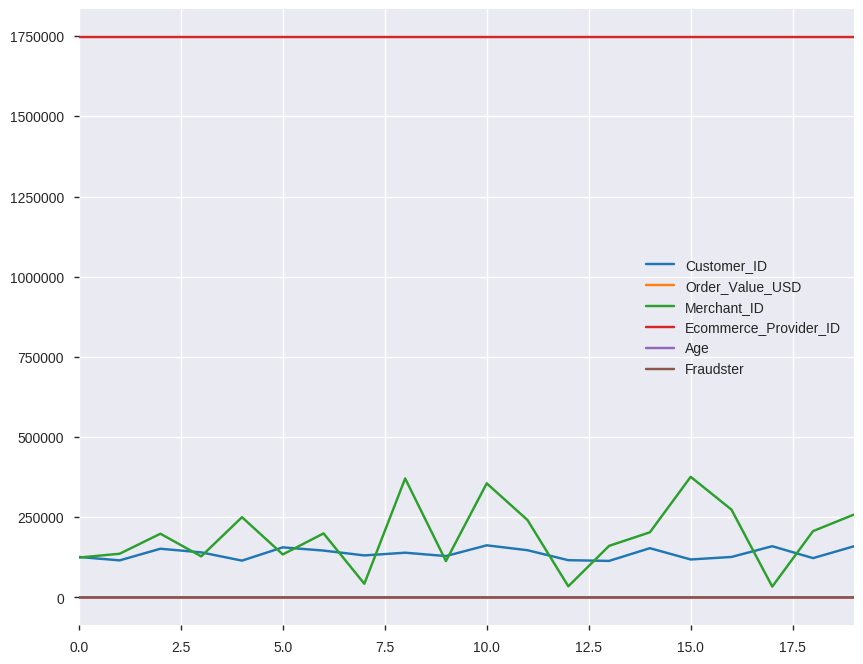

In [152]:
# Line plot
merged_train.head(20).plot(kind='line', figsize=(10,8))
plt.show()

In [153]:
merged_train.sample(10)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent
35757,116776,0d639d10a755,2018-04-12 03:58:14,65,Ads,Debit Card,220031,1746213,2018-03-19 09:26:00,ZCXMUWJQCPSRA,M,25,78.71.220.89,0,Europe
43350,154016,c293f37b3433,2018-07-21 08:01:53,65,Ads,Credit Card,39272,1746213,2018-06-22 02:59:06,EKOFRVSLJTFQZ,M,40,86.89.241.132,0,Europe
50141,123209,3b7bd41dd6cf,2018-04-05 23:49:23,28,Ads,E-wallet,282677,1746213,2018-02-27 19:56:04,ONHHEXJBKNDAP,M,25,83.33.195.86,0,Europe
33376,162771,a8ae764b7c0e,2018-03-31 08:21:53,28,SEO,Internet Banking,43114,1746213,2018-02-10 04:35:49,NMAAVLCGYVTET,F,27,35.82.210.77,0,North America
9872,163294,105e0f23b9fb,2018-09-06 12:55:13,35,Ads,Credit Card,33545,1746213,2018-05-29 04:51:31,EBKOGXGJYODPW,M,48,86.132.239.191,0,Europe
40592,120807,dde278adf1bb,2018-03-04 19:24:09,25,SEO,Credit Card,18236,1746213,2018-01-14 17:32:55,MKXHCDRVXMEVV,F,34,144.132.94.12,0,Oceania
45449,143656,d0cdbd3eba28,2018-01-08 01:37:04,25,SEO,E-wallet,340146,1746213,2018-01-06 01:37:03,TYFYSQMGCCDIG,M,52,44.221.130.127,1,North America
29362,130553,d3f62b77dc37,2018-05-13 03:03:26,95,Direct,Credit Card,270796,1746213,2018-05-04 06:18:19,LIBYHKENAOHSV,F,42,14.50.10.231,0,Asia
53701,117364,9c9c4bb155ce,2018-06-07 03:46:49,148,Ads,Credit Card,42930,1746213,2018-02-27 11:40:53,OGTGLBGBHCUJE,M,39,11.125.50.45,0,North America
8351,143124,68811c07ed98,2018-09-11 16:12:15,32,Ads,Debit Card,352704,1746213,2018-07-16 13:39:22,TFCSEEUSCWBFK,F,32,156.25.106.215,0,Europe


In [154]:
merged_train['Continent'].isnull().sum()

7751

In [0]:
from geolite2 import geolite2

def get_continent(ip):
    try:
        x = geo.get(ip)
    except ValueError:
        return pd.np.nan
    try:
        return x['continent']['names']['en'] if x else pd.np.nan
    except KeyError:
        return pd.np.nan

geo = geolite2.reader()

# IP's for testing: http://upd.emule-security.org/ipfilter.zip
#x = pd.read_csv(r'D:\download\ipfilter.zip',usecols=[0], sep='\s*\-\s*',header=None, names=['ip'])

# get unique IPs
unique_ips = merged_test["IP_Address"].unique()
# make series out of it
unique_ips = pd.Series(unique_ips, index = unique_ips)
# map IP --> country
merged_test['Continent'] = merged_test['IP_Address'].map(unique_ips.apply(get_continent))

geolite2.close()

In [0]:
merged_train['Continent'].fillna('Unknown', inplace=True)

In [157]:
merged_train.sample(2)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent
28399,120859,3d7db2eea8f2,2018-04-15 18:13:57,38,Ads,E-wallet,315633,1746213,2018-02-06 13:59:39,TRONEJNUHUAJA,M,36,2.145.229.145,0,Asia
34215,139840,59b994c72368,2018-09-09 08:25:22,62,SEO,Debit Card,223912,1746213,2018-06-01 01:26:33,CRILRGXIDCJJP,M,30,139.248.50.115,0,North America


In [0]:
merged_train['Continent'].fillna('Unknown', inplace=True)

In [159]:
merged_test['Continent'].isnull().sum()

1967

In [0]:
merged_test['Continent'].fillna('Unknown', inplace=True)

In [0]:

conti = pd.crosstab(merged_train.Fraudster, merged_train.Continent)

In [162]:

conti

Continent,Africa,Asia,Europe,North America,Oceania,South America,Unknown
Fraudster,,,,,,,
0,585,10371,8637,20123,711,1661,7100
1,81,1062,849,2126,67,189,651


#### Feature Engineering

Converting Date_of_order and Merchand_registration_date type as datetime64
for both train and test data 

In [0]:
merged_train["Date_of_Order"] = merged_train["Date_of_Order"].astype('datetime64[ns]') 
merged_train["Merchant_Registration_Date"] = merged_train["Merchant_Registration_Date"].astype('datetime64[ns]')

In [0]:
merged_test["Date_of_Order"] = merged_test["Date_of_Order"].astype('datetime64[ns]') 
merged_test["Merchant_Registration_Date"] = merged_test["Merchant_Registration_Date"].astype('datetime64[ns]')

In [165]:
merged_train.head(5)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0,Europe
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0,South America
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1,Europe
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,0,North America
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,0,Europe


In [166]:
merged_test.head(5)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America


Creating a new_feature Difference_Date by substracting Date_of_order and Merchant_registration_date

In [0]:
merged_train["Difference_Dates"]=(merged_train["Date_of_Order"])- ( merged_train["Merchant_Registration_Date"])
merged_test["Difference_Dates"]=(merged_test["Date_of_Order"])- ( merged_test["Merchant_Registration_Date"])

In [168]:
merged_train.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent,Difference_Dates
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0,Europe,10 days 15:51:06
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0,South America,31 days 17:35:03
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1,Europe,76 days 13:48:31
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,0,North America,117 days 03:49:38
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,0,Europe,116 days 23:07:37


In [169]:
merged_test.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25 days 12:19:13
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68 days 06:51:40
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe,91 days 11:31:47
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America,40 days 15:56:52
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America,7 days 10:17:59


Dividing Difference_dates by day we get the differnce

In [0]:
merged_train["Difference_Dates"]=merged_train["Difference_Dates"]/np.timedelta64(1, "D")
merged_test["Difference_Dates"]=merged_test["Difference_Dates"]/np.timedelta64(1, "D")

In [171]:
merged_train.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent,Difference_Dates
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0,Europe,10.660486
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0,South America,31.732674
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1,Europe,76.575359
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,0,North America,117.159468
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,0,Europe,116.963623


In [172]:
merged_test.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25.513345
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68.285880
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe,91.480405
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America,40.664491
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America,7.429155


In [173]:
merged_train[merged_train["Difference_Dates"]<=0].Fraudster.value_counts()

Series([], Name: Fraudster, dtype: int64)

In [174]:
merged_train.Fraudster.value_counts()

0    49188
1     5025
Name: Fraudster, dtype: int64

In [0]:
train_dev_Id=merged_train['Registered_Device_ID']
test_dev_id=merged_test['Registered_Device_ID']

In [0]:
train_dev_Id= pd.DataFrame(train_dev_Id)
test_dev_id=pd.DataFrame(test_dev_id)

In [0]:
merged_train['Registered_Device_Count'] = train_dev_Id.apply(lambda x: x.map(x.value_counts()))
merged_test['Registered_Device_Count'] = test_dev_id.apply(lambda x: x.map(x.value_counts()))

In [178]:
merged_train.head(10)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent,Difference_Dates,Registered_Device_Count
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0,Europe,10.660486,1
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0,South America,31.732674,1
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1,Europe,76.575359,1
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,0,North America,117.159468,1
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,0,Europe,116.963623,1
5,156106,f1e5595ef446,2018-05-13 08:20:42,100,Direct,Internet Banking,134043,1746213,2018-01-14 04:00:40,WUTMJNOOMJVPB,M,22,189.20.88.190,0,South America,119.180579,1
6,146054,96d864107383,2018-03-30 02:47:44,65,SEO,Credit Card,199582,1746213,2018-03-06 20:57:39,FLPWOWXWKIKLY,M,47,12.2.181.60,0,North America,23.243113,1
7,130966,c26e79192d46,2018-08-28 16:48:35,140,SEO,E-wallet,42529,1746213,2018-05-06 12:57:03,SILPRWIQBZENF,F,31,177.217.21.179,0,South America,114.160787,1
8,139404,4bbf3902918f,2018-09-19 08:29:24,100,SEO,Debit Card,370985,1746213,2018-06-14 02:11:50,VBFDELIQZJXKM,F,21,199.131.246.210,0,North America,97.262199,1
9,128964,8551ac9908b4,2018-01-06 15:16:03,45,Direct,Credit Card,113335,1746213,2018-01-04 15:16:02,GXZWUMERANRMA,M,38,35.163.82.112,1,North America,2.000012,5


In [179]:
merged_test.head(10)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates,Registered_Device_Count
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25.513345,1
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68.285880,1
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe,91.480405,1
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America,40.664491,1
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America,7.429155,1
5,138132,403af6a56bf6,2018-03-12 17:49:02,45,Direct,E-wallet,99740,1746213,2018-01-14 22:38:00,QLABSSSYDDVLX,F,53,67.233.208.80,North America,56.799329,1
6,126307,2000c9a7f224,2018-01-14 01:04:38,125,Ads,Internet Banking,286064,1746213,2018-01-12 01:04:37,YZUTNBIQUUKJG,M,28,88.120.173.167,Europe,2.000012,3
7,156600,14cef8a72083,2018-07-10 21:31:50,65,Ads,Internet Banking,106848,1746213,2018-05-19 08:50:04,QNDARFHAOPKEU,M,33,119.4.77.135,Asia,52.529005,1
8,157709,3bd27c578c4f,2018-08-18 02:37:37,228,SEO,Credit Card,312957,1746213,2018-07-28 09:06:07,WWYIKYOOFLPXA,F,29,86.93.77.38,Europe,20.730208,1
9,116897,21e5e03d5346,2018-07-20 21:37:01,85,SEO,Credit Card,97205,1746213,2018-03-25 19:01:48,UHNFWFTDUJCUJ,M,50,67.83.248.123,North America,117.107789,1


##### Binning into Four Levels

In [0]:
bins = [0,3,5,7,10]
labels = ["low","medium","high","very-high"]
merged_train['Binned_Device_Count'] = pd.cut(merged_train['Registered_Device_Count'], bins=bins, labels=labels)
merged_test['Binned_Device_Count'] = pd.cut(merged_test['Registered_Device_Count'], bins=bins, labels=labels)

In [181]:
merged_train.head(10)

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Fraudster,Continent,Difference_Dates,Registered_Device_Count,Binned_Device_Count
0,126221,37cea9512f8d,2018-04-29 16:39:26,148,Direct,Credit Card,124231,1746213,2018-04-19 00:48:20,BEJVAJMFDUVOQ,M,30,37.113.112.143,0,Europe,10.660486,1,low
1,115471,09f12e6efde2,2018-06-16 17:05:40,145,SEO,Credit Card,136178,1746213,2018-05-15 23:30:37,GFHLOGZGFHNYH,F,20,190.255.172.133,0,South America,31.732674,1,low
2,151786,4e69e956e159,2018-10-26 18:00:46,62,Ads,Internet Banking,198611,1746213,2018-08-11 04:12:15,MTELXLHIBWHGI,F,46,130.243.149.190,1,Europe,76.575359,1,low
3,140456,663443aaeb82,2018-12-12 05:41:52,28,SEO,Debit Card,127993,1746213,2018-08-17 01:52:14,ZPJCMOXVRXVJF,M,37,48.250.147.203,0,North America,117.159468,1,low
4,114721,99258810c121,2018-09-20 11:06:10,70,Ads,Credit Card,250146,1746213,2018-05-26 11:58:33,NVDDVXILKZTVO,F,26,212.167.41.153,0,Europe,116.963623,1,low
5,156106,f1e5595ef446,2018-05-13 08:20:42,100,Direct,Internet Banking,134043,1746213,2018-01-14 04:00:40,WUTMJNOOMJVPB,M,22,189.20.88.190,0,South America,119.180579,1,low
6,146054,96d864107383,2018-03-30 02:47:44,65,SEO,Credit Card,199582,1746213,2018-03-06 20:57:39,FLPWOWXWKIKLY,M,47,12.2.181.60,0,North America,23.243113,1,low
7,130966,c26e79192d46,2018-08-28 16:48:35,140,SEO,E-wallet,42529,1746213,2018-05-06 12:57:03,SILPRWIQBZENF,F,31,177.217.21.179,0,South America,114.160787,1,low
8,139404,4bbf3902918f,2018-09-19 08:29:24,100,SEO,Debit Card,370985,1746213,2018-06-14 02:11:50,VBFDELIQZJXKM,F,21,199.131.246.210,0,North America,97.262199,1,low
9,128964,8551ac9908b4,2018-01-06 15:16:03,45,Direct,Credit Card,113335,1746213,2018-01-04 15:16:02,GXZWUMERANRMA,M,38,35.163.82.112,1,North America,2.000012,5,medium


In [182]:
merged_test.head()

,Customer_ID,Order_ID,Date_of_Order,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Ecommerce_Provider_ID,Merchant_Registration_Date,Registered_Device_ID,Gender,Age,IP_Address,Continent,Difference_Dates,Registered_Device_Count,Binned_Device_Count
0,157068,a032de091f51,2018-03-09 09:09:42,60,SEO,Credit Card,53637,1746213,2018-02-11 20:50:29,PTMLBENYMQCTV,F,40,134.162.124.62,North America,25.513345,1,low
1,112534,0d563f0606d6,2018-06-13 20:11:19,28,SEO,Credit Card,243517,1746213,2018-04-06 13:19:39,HMCLDZUZPWZRR,M,39,152.76.98.87,Oceania,68.285880,1,low
2,148774,18fb0fa888b6,2018-04-14 04:19:36,75,Ads,Debit Card,343640,1746213,2018-01-12 16:47:49,VLGSMAPXISSEJ,M,23,31.202.3.255,Europe,91.480405,1,low
3,114528,ed1eb920d721,2018-04-01 13:55:44,98,SEO,Credit Card,69889,1746213,2018-02-19 21:58:52,ZINHISBBOKQXT,M,34,12.242.168.185,North America,40.664491,1,low
4,120940,313dcf962627,2018-05-25 02:08:18,35,SEO,Credit Card,125706,1746213,2018-05-17 15:50:19,WFKEAOTPHTYEO,M,20,26.61.210.47,North America,7.429155,1,low


In [183]:
merged_train['Binned_Device_Count'].value_counts()

low          51985
medium        1168
high           835
very-high      225
Name: Binned_Device_Count, dtype: int64

In [184]:

merged_test['Binned_Device_Count'].value_counts()

low          13473
medium          81
very-high        0
high             0
Name: Binned_Device_Count, dtype: int64

### Dropping the columns

In [0]:
merged_train.drop(["Customer_ID", "Order_ID","Date_of_Order","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [0]:
merged_test.drop(["Customer_ID", "Order_ID","Date_of_Order","Ecommerce_Provider_ID","Merchant_Registration_Date","Registered_Device_ID","IP_Address","Registered_Device_Count"], axis = 1, inplace = True)

In [187]:
merged_train.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Fraudster,Continent,Difference_Dates,Binned_Device_Count
0,148,Direct,Credit Card,124231,M,30,0,Europe,10.660486,low
1,145,SEO,Credit Card,136178,F,20,0,South America,31.732674,low
2,62,Ads,Internet Banking,198611,F,46,1,Europe,76.575359,low
3,28,SEO,Debit Card,127993,M,37,0,North America,117.159468,low
4,70,Ads,Credit Card,250146,F,26,0,Europe,116.963623,low


In [188]:
merged_test.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,60,SEO,Credit Card,53637,F,40,North America,25.513345,low
1,28,SEO,Credit Card,243517,M,39,Oceania,68.285880,low
2,75,Ads,Debit Card,343640,M,23,Europe,91.480405,low
3,98,SEO,Credit Card,69889,M,34,North America,40.664491,low
4,35,SEO,Credit Card,125706,M,20,North America,7.429155,low


In [0]:
Y=merged_train['Fraudster']

In [0]:

Y=pd.DataFrame(Y)

In [0]:
merged_train.drop(["Fraudster"], axis = 1, inplace = True)

In [192]:
merged_train.head(10)

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,148,Direct,Credit Card,124231,M,30,Europe,10.660486,low
1,145,SEO,Credit Card,136178,F,20,South America,31.732674,low
2,62,Ads,Internet Banking,198611,F,46,Europe,76.575359,low
3,28,SEO,Debit Card,127993,M,37,North America,117.159468,low
4,70,Ads,Credit Card,250146,F,26,Europe,116.963623,low
5,100,Direct,Internet Banking,134043,M,22,South America,119.180579,low
6,65,SEO,Credit Card,199582,M,47,North America,23.243113,low
7,140,SEO,E-wallet,42529,F,31,South America,114.160787,low
8,100,SEO,Debit Card,370985,F,21,North America,97.262199,low
9,45,Direct,Credit Card,113335,M,38,North America,2.000012,medium


In [193]:
merged_test.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,60,SEO,Credit Card,53637,F,40,North America,25.513345,low
1,28,SEO,Credit Card,243517,M,39,Oceania,68.285880,low
2,75,Ads,Debit Card,343640,M,23,Europe,91.480405,low
3,98,SEO,Credit Card,69889,M,34,North America,40.664491,low
4,35,SEO,Credit Card,125706,M,20,North America,7.429155,low


In [194]:
merged_train.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates         float64
Binned_Device_Count     category
dtype: object

In [0]:
merged_train["Difference_Dates"]= merged_train["Difference_Dates"].astype('int64')

In [196]:

merged_train.dtypes

Order_Value_USD            int64
Order_Source              object
Order_Payment_Method      object
Merchant_ID                int64
Gender                    object
Age                        int64
Continent                 object
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [197]:
merged_test.head()

,Order_Value_USD,Order_Source,Order_Payment_Method,Merchant_ID,Gender,Age,Continent,Difference_Dates,Binned_Device_Count
0,60,SEO,Credit Card,53637,F,40,North America,25.513345,low
1,28,SEO,Credit Card,243517,M,39,Oceania,68.285880,low
2,75,Ads,Debit Card,343640,M,23,Europe,91.480405,low
3,98,SEO,Credit Card,69889,M,34,North America,40.664491,low
4,35,SEO,Credit Card,125706,M,20,North America,7.429155,low


In [0]:
merged_test["Difference_Dates"]= merged_test["Difference_Dates"].astype('int64')

Converting Object to category

For train and test data

In [0]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    merged_train[i]=merged_train[i].astype('category')

In [200]:
merged_train.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Merchant_ID                int64
Gender                  category
Age                        int64
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

In [0]:
category=['Order_Source','Order_Payment_Method',"Gender",'Continent','Binned_Device_Count']
for i in category:
    merged_test[i]=merged_test[i].astype('category')

In [202]:
merged_test.dtypes

Order_Value_USD            int64
Order_Source            category
Order_Payment_Method    category
Merchant_ID                int64
Gender                  category
Age                        int64
Continent               category
Difference_Dates           int64
Binned_Device_Count     category
dtype: object

Dummification 

In [0]:
merged_train = pd.get_dummies(merged_train)
merged_test = pd.get_dummies(merged_test)

In [204]:
merged_train.head(2)

,Order_Value_USD,Merchant_ID,Age,Difference_Dates,Order_Source_Ads,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Cash On Delivery,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Gender_F,Gender_M,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown,Binned_Device_Count_low,Binned_Device_Count_medium,Binned_Device_Count_high,Binned_Device_Count_very-high
0,148,124231,30,10,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
1,145,136178,20,31,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0


In [205]:
merged_test.head(2)

,Order_Value_USD,Merchant_ID,Age,Difference_Dates,Order_Source_Ads,Order_Source_Direct,Order_Source_SEO,Order_Payment_Method_Cash On Delivery,Order_Payment_Method_Credit Card,Order_Payment_Method_Debit Card,Order_Payment_Method_E-wallet,Order_Payment_Method_Internet Banking,Gender_F,Gender_M,Continent_Africa,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Continent_Unknown,Binned_Device_Count_low,Binned_Device_Count_medium,Binned_Device_Count_high,Binned_Device_Count_very-high
0,60,53637,40,25,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
1,28,243517,39,68,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


Seperating Numerical and categorical data

In [0]:
cat_attr = list(merged_train.select_dtypes("category").columns)
num_attr = list(merged_train.columns.difference(cat_attr))

In [207]:
num_attr

['Age',
 'Binned_Device_Count_high',
 'Binned_Device_Count_low',
 'Binned_Device_Count_medium',
 'Binned_Device_Count_very-high',
 'Continent_Africa',
 'Continent_Asia',
 'Continent_Europe',
 'Continent_North America',
 'Continent_Oceania',
 'Continent_South America',
 'Continent_Unknown',
 'Difference_Dates',
 'Gender_F',
 'Gender_M',
 'Merchant_ID',
 'Order_Payment_Method_Cash On Delivery',
 'Order_Payment_Method_Credit Card',
 'Order_Payment_Method_Debit Card',
 'Order_Payment_Method_E-wallet',
 'Order_Payment_Method_Internet Banking',
 'Order_Source_Ads',
 'Order_Source_Direct',
 'Order_Source_SEO',
 'Order_Value_USD']

Most Correlated:


[('Order_Source_SEO', 'Order_Source_Ads', -0.6608221090861365),
 ('Binned_Device_Count_low',
  'Binned_Device_Count_medium',
  -0.7167713294703019),
 ('Binned_Device_Count_medium',
  'Binned_Device_Count_medium',
  0.9999999999999998)]

Least Correlated:


[('Continent_North America', 'Order_Value_USD', -6.043504436134938e-05),
 ('Order_Value_USD', 'Age', 6.594770392398972e-05),
 ('Continent_North America',
  'Order_Payment_Method_Credit Card',
  9.392273629632011e-05)]

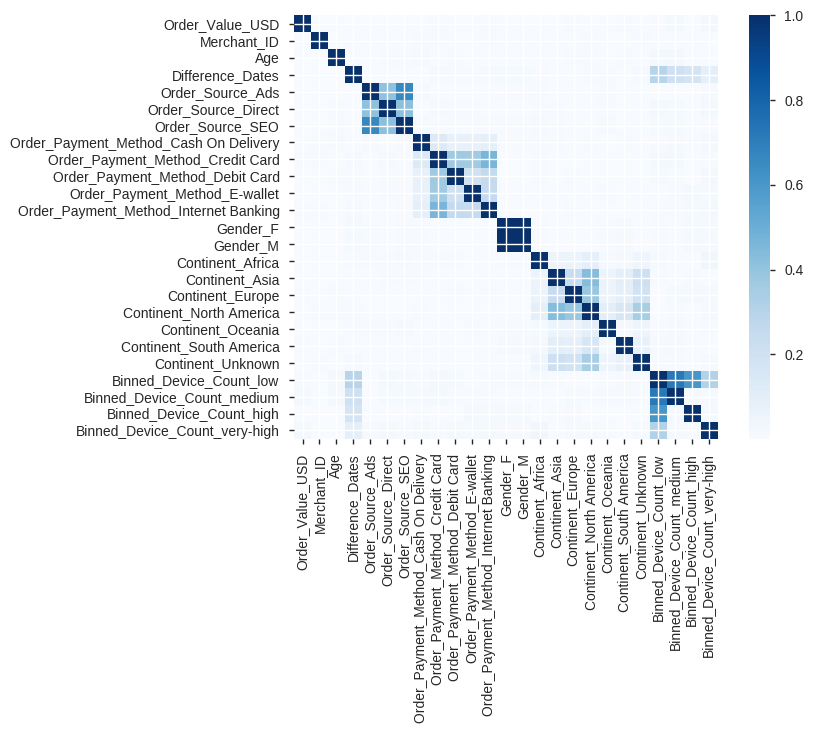

In [208]:
#Correlation matrix
def correlation_matrix_from(dataframe):
    return np.corrcoef(dataframe, rowvar=False)

def corr_plot(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)
    
    plt.imshow(np.abs(corr_matrix), cmap=plt.cm.Blues, interpolation='nearest')
    plt.xticks(range(size), dataframe.columns, rotation=90)
    plt.yticks(range(size), dataframe.columns)
    plt.colorbar()
    plt.show()

def least_to_most(dataframe):
    corr_matrix = correlation_matrix_from(dataframe)
    size = len(corr_matrix)
    
    def sort_correlations():
        abs_corr_matrix = np.abs(corr_matrix)
        arg_sorted = np.argsort(abs_corr_matrix, axis=None)[:-size:2]  # Remove diagonals
        ix, iy = np.unravel_index(arg_sorted, abs_corr_matrix.shape)
        return ix, iy, corr_matrix.ravel()[arg_sorted]
    
    f1, f2, vals = sort_correlations()
    return list(zip(dataframe.columns[f1], dataframe.columns[f2], vals))


corr_plot(merged_train)
ordered_correlations = least_to_most(merged_train)

print("Most Correlated:")
display(ordered_correlations[-3:])

print("Least Correlated:")
display(ordered_correlations[:3])

### Pipeline

In [0]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_attr),
        ('cat', categorical_transformer, cat_attr)])

In [212]:
preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num',
                                 Pipeline(memory=None,
                                          steps=[('imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                           

In [0]:
##Split into train and test

#train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(merged_train, Y, test_size = 0.3, random_state= 42)

In [214]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((37949, 25), (16264, 25), (37949, 1), (16264, 1))

### Model Building

### Logistic Regression - 1

In [0]:
clf_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [216]:
clf_logreg.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                             

In [217]:
train_pred = clf_logreg.predict(X_train)
test_pred = clf_logreg.predict(X_test)

print(clf_logreg.score(X_train, Y_train))
print(clf_logreg.score(X_test, Y_test))
print("\n")
print(confusion_matrix(y_true=Y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=Y_test, y_pred =  test_pred)
confusion_matrix_test

0.9406308466626262
0.9415887850467289


[[34278   139]
 [ 2114  1418]]


array([[14707,    64],
       [  886,   607]])

In [218]:
#Accuracy Precision Recall on logistic model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9406308466626262
The precision score for train: 0.9107257546563905
The recall score for train: 0.4014722536806342
The F1 score for train: 0.5572804087247003


In [219]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9415887850467289
The precision score for test: 0.9046199701937406
The recall score for test: 0.40656396517079707
The F1 score for test: 0.5609981515711646


In [220]:

model_1_log= clf_logreg.predict(merged_test)
model_1_log

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
final= pd.DataFrame({'Merchant_ID' : merged_test['Merchant_ID'],
                     'Fraudster' : model_1_log})

In [0]:
final.to_csv("submission_log_1.csv",index=False)

### Build Decision Tree Model - 2

In [223]:
%%time
clf_dt = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

dt_param_grid = {'classifier__criterion': ['entropy', 'gini'], 'classifier__max_depth': [6,8,10,12], 
                 "classifier__min_samples_split": [2, 10, 20],"classifier__min_samples_leaf": [1, 5, 10]}

dt_grid = GridSearchCV(clf_dt, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,Y_train)

CPU times: user 1min 23s, sys: 367 ms, total: 1min 23s
Wall time: 1min 23s


In [224]:
dt_grid.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 6,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 20}

In [225]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

print(dt_grid.score(X_train, Y_train))
print(dt_grid.score(X_test, Y_test))

0.9497219953094943
0.947798819478603


In [226]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9497219953094943
The precision score for train: 0.9
The recall score for train: 0.5172706681766704
The F1 score for train: 0.656957928802589


In [227]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.947798819478603
The precision score for test: 0.8538461538461538
The recall score for test: 0.5204286671131949
The F1 score for test: 0.6466916354556804


In [228]:
model_2_dt= dt_grid.predict(merged_test)
model_2_dt

array([0, 0, 0, ..., 0, 1, 0])

In [0]:
final= pd.DataFrame({'Merchant_ID' : merged_test['Merchant_ID'],
                     'Fraudster' : model_2_dt})

In [0]:
final.to_csv("submission_dt.csv",index=False)

### Build Gradient Boosting - 3

In [0]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('GBM',GradientBoostingClassifier())])

In [232]:
%%time
gbm_param_grid = {'GBM__max_depth': [8,10,12,14], 'GBM__subsample': [0.8, 0.3], 'GBM__max_features':[0.2, 0.3], 
              'GBM__n_estimators': [10, 20, 30]}

gbm_grid = GridSearchCV(clf, param_grid=gbm_param_grid, cv=3)

gbm_grid.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

CPU times: user 2min 40s, sys: 290 ms, total: 2min 40s
Wall time: 2min 41s


In [233]:
gbm_grid.best_params_

{'GBM__max_depth': 14,
 'GBM__max_features': 0.2,
 'GBM__n_estimators': 30,
 'GBM__subsample': 0.8}

In [234]:
train_pred = gbm_grid.predict(X_train)
test_pred = gbm_grid.predict(X_test)

print(gbm_grid.score(X_train, Y_train))
print(gbm_grid.score(X_test, Y_test))


0.9648212074099449
0.9497663551401869


In [235]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9648212074099449
The precision score for train: 1.0
The recall score for train: 0.6220271800679502
The F1 score for train: 0.7669750392738698


In [236]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9497663551401869
The precision score for test: 0.8967136150234741
The recall score for test: 0.5117213663764233
The F1 score for test: 0.6515991471215351


In [237]:
model_3_gb= gbm_grid.predict(merged_test)
model_3_gb

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
final= pd.DataFrame({'Merchant_ID' : merged_test['Merchant_ID'],
                     'Fraudster' : model_3_gb})

In [0]:
final.to_csv("gunjan_B76_3562_submission_gb.csv",index=False)

### Build SVM - 4

In [243]:
%%time
svc_lin = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])
svc_lin.set_params(classifier__kernel='linear',classifier__C=1,
                   classifier__random_state=123)

svc_lin.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 10.5 s, sys: 173 ms, total: 10.6 s
Wall time: 10.7 s


In [248]:
train_pred = svc_lin.predict(X_train)
test_pred = svc_lin.predict(X_test)

print(svc_lin.score(X_train, Y_train))
print(svc_lin.score(X_test, Y_test))

0.9406308466626262
0.9415887850467289


In [249]:


print(confusion_matrix(y_true=Y_train, y_pred = train_pred))

confusion_matrix_test = confusion_matrix(y_true=Y_test, y_pred =  test_pred)

[[34278   139]
 [ 2114  1418]]


In [250]:
print("The accuracy score for train:",accuracy_score(Y_train, train_pred))
print("The precision score for train:",precision_score(Y_train, train_pred))
print("The recall score for train:",recall_score(Y_train, train_pred))
print("The F1 score for train:",f1_score(Y_train, train_pred))

The accuracy score for train: 0.9406308466626262
The precision score for train: 0.9107257546563905
The recall score for train: 0.4014722536806342
The F1 score for train: 0.5572804087247003


In [251]:
print("The accuracy score for test:",accuracy_score(Y_test, test_pred))
print("The precision score for test:",precision_score(Y_test, test_pred))
print("The recall score for test:",recall_score(Y_test, test_pred))
print("The F1 score for test:",f1_score(Y_test, test_pred))

The accuracy score for test: 0.9415887850467289
The precision score for test: 0.9046199701937406
The recall score for test: 0.40656396517079707
The F1 score for test: 0.5609981515711646


In [254]:
model_4_svm= svc_lin.predict(merged_test)
model_4_svm

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
final= pd.DataFrame({'Merchant_ID' : merged_test['Merchant_ID'],
                     'Fraudster' : model_4_svm})

In [0]:
final.to_csv("Gunjan_B76_3562_submission_svm.csv",index=False)